States found in the CSV: ['Alabama']


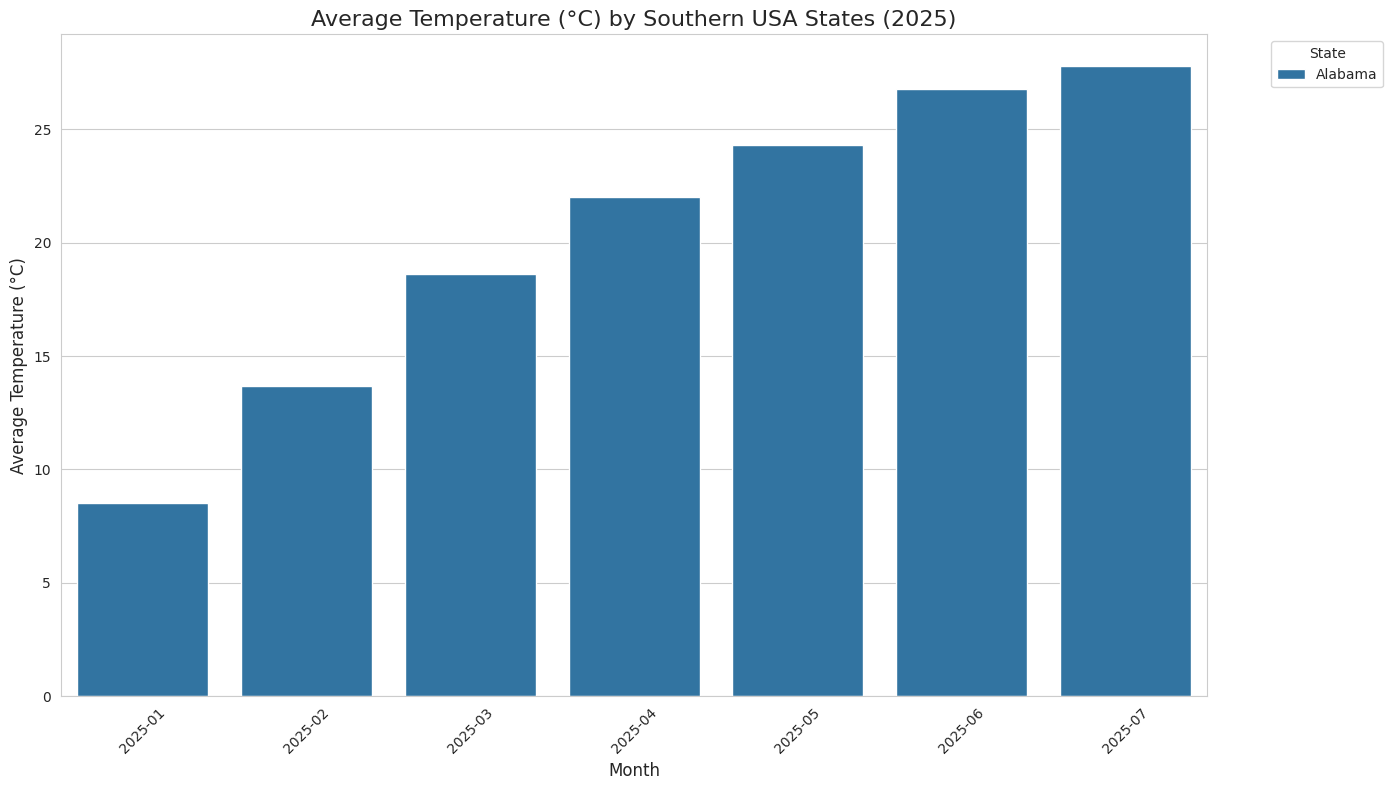

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_name = 'airTempMonthlies2025.csv'
df = pd.read_csv(file_name)

# List of target states
target_states = ['Florida', 'Georgia', 'Alabama', 'South Carolina', 'Mississippi', 'Louisiana']

# Improved state extraction function (Case-insensitive)
def extract_state(row):
    combined_text = f"{str(row['site_name'])} {str(row['org_name'])}".lower()
    for state in target_states:
        if state.lower() in combined_text:
            return state
    return None

df['state'] = df.apply(extract_state, axis=1)

# Filter for our states
filtered_df = df[df['state'].notna()].copy()

# Ensure numeric types and dates
filtered_df['average_temp_c'] = pd.to_numeric(filtered_df['average_temp_c'], errors='coerce')
filtered_df['measured_on'] = pd.to_datetime(filtered_df['measured_on'])

# Verify which states we found
found_states = filtered_df['state'].unique()
print(f"States found in the CSV: {found_states}")

# Group by state and date for the bar chart
chart_data = filtered_df.groupby(['state', 'measured_on'])['average_temp_c'].mean().reset_index()

# Create the plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Using a grouped bar chart to show states side-by-side for each date
plot = sns.barplot(
    data=chart_data,
    x=chart_data['measured_on'].dt.strftime('%Y-%m'),
    y='average_temp_c',
    hue='state'
)

# Formatting
plt.title('Average Temperature (°C) by Southern USA States (2025)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

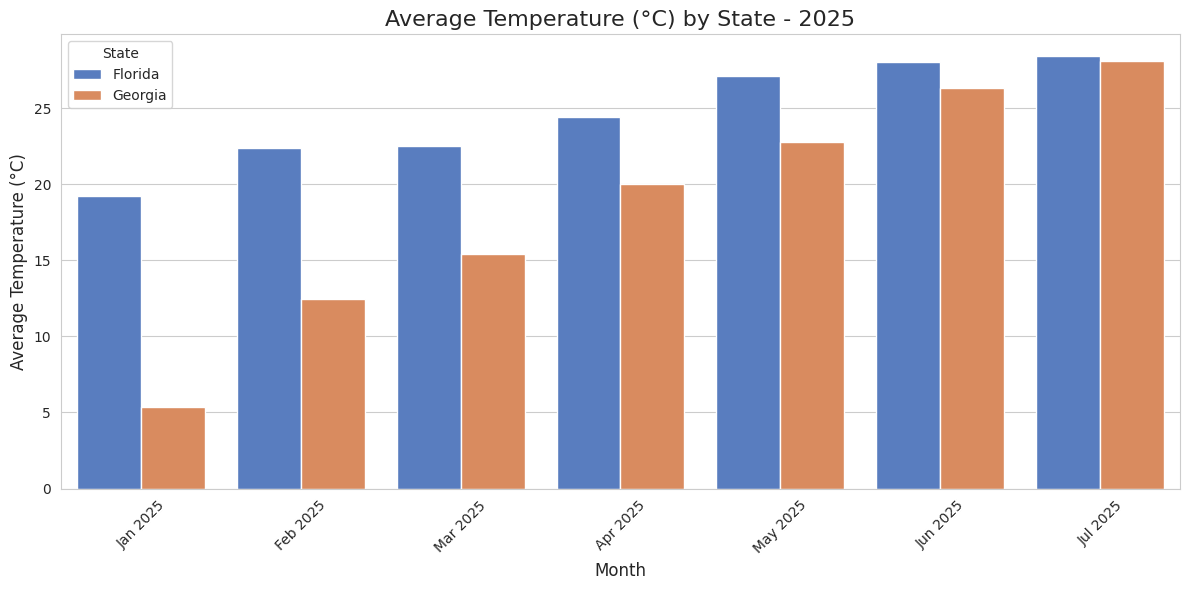

In [ ]:
site_to_state = {
    'PBHS WeatherBug': 'Florida',
    'Carrollwood Day School': 'Florida',
    'Coral Gables Sr High School': 'Florida',
    'Hope of the Generations Church': 'Georgia',
    'Mt Desales Academy': 'Georgia',
    'Exact Site Name From CSV': 'South Carolina',
    'Another Site Name': 'Mississippi'
}



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_name = 'airTempMonthlies2025.csv'
df = pd.read_csv(file_name)

# Define a mapping of Site Names to States
site_to_state = {
    'PBHS WeatherBug': 'Florida',
    'Carrollwood Day School': 'Florida',
    'Coral Gables Sr High School': 'Florida',
    'Hope of the Generations Church': 'Georgia',
    'Mt Desales Academy': 'Georgia'
}

# Create the state column based on the site_name
df['state'] = df['site_name'].map(site_to_state)

# Filter for only the rows that matched our target sites
filtered_df = df[df['state'].notna()].copy()

# Ensure numeric types and dates
filtered_df['average_temp_c'] = pd.to_numeric(filtered_df['average_temp_c'], errors='coerce')
filtered_df['measured_on'] = pd.to_datetime(filtered_df['measured_on'])

# Group by state and date to average the temperatures
chart_data = filtered_df.groupby(['state', 'measured_on'])['average_temp_c'].mean().reset_index()

# Sort by date so the chart flows chronologically
chart_data = chart_data.sort_values('measured_on')

# Create the plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Bar chart
plot = sns.barplot(
    data=chart_data,
    x=chart_data['measured_on'].dt.strftime('%b %Y'),
    y='average_temp_c',
    hue='state',
    palette='muted'
)

# Formatting
plt.title('Average Temperature (°C) by State - 2025', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.legend(title='State')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()